In [159]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [160]:
# Load the dataset
movies_data = pd.read_csv(r'IMDB_movie_data.csv')
print(movies_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


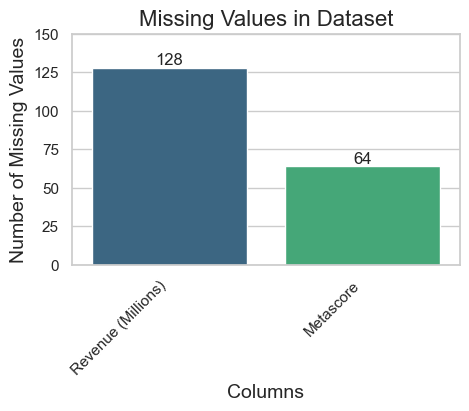

In [161]:
# Checking the dataset for missing values
missing_values = movies_data.isna().sum()

# Filter out columns with 0 missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values using seaborn
plt.figure(figsize=(5, 3))
bar_plot = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

# Adding title and labels
plt.title('Missing Values in Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, horizontalalignment='right')

# Setting y-axis limits to improve readability
bar_plot.set_ylim(0,150)

# Adding data labels
for i, value in enumerate(missing_values.values):
    bar_plot.annotate(f'{value}', xy=(i, value), ha='center', va='bottom')

# Display the plot
plt.show()

In [162]:
movie_cleared = movies_data.dropna()
movie_cleared = movie_cleared.reset_index(drop=True)

# Subseting only poitive revenue movies
movie_cleared = movie_cleared[movie_cleared['Revenue (Millions)'] > 0]

missing_values = movie_cleared.isna().sum()

# Check if there are any missing values left
if missing_values.sum() > 0:
    print(missing_values)
else:
    print("No empty fields are available.")

No empty fields are available.


        Metascore  Revenue (Millions)  Runtime (Minutes)
count  837.000000          837.000000         837.000000
mean    59.586619           84.665591         114.661888
std     16.959316          104.541767          18.469466
min     11.000000            0.010000          66.000000
25%     47.000000           13.990000         101.000000
50%     60.000000           48.240000         112.000000
75%     72.000000          116.870000         124.000000
max    100.000000          936.630000         187.000000
Correlation between Revenue and Metascore: 0.14
Correlation between Revenue and Runtime: 0.28
Correlation between Metascore and Runtime: 0.22


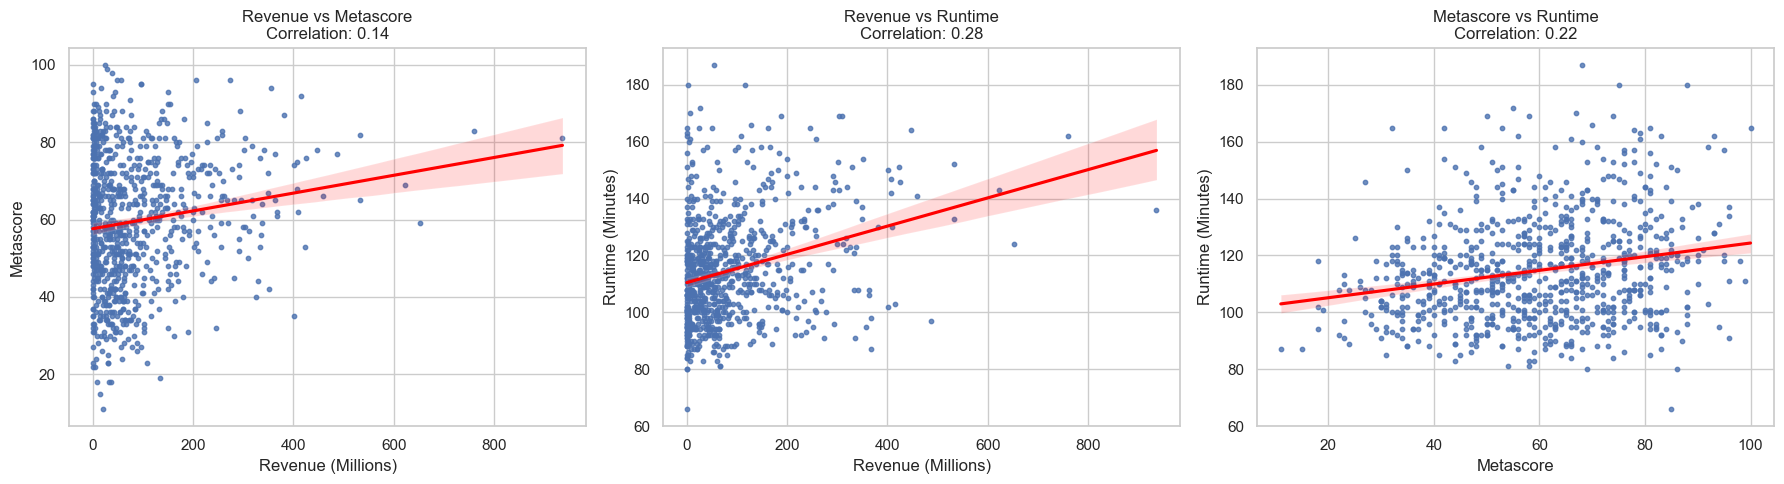

In [163]:
# Describing the dataset
columns_to_describe = ["Metascore", "Revenue (Millions)", "Runtime (Minutes)"]
print(movie_cleared[columns_to_describe].describe())

# correlation between the columns

cor_rev_to_metascor = movie_cleared["Revenue (Millions)"].corr(movie_cleared["Metascore"])
cor_rev_to_runtime = movie_cleared["Revenue (Millions)"].corr(movie_cleared["Runtime (Minutes)"])
cor_metascor_to_runtime = movie_cleared["Metascore"].corr(movie_cleared["Runtime (Minutes)"])

print(f"Correlation between Revenue and Metascore: {cor_rev_to_metascor:.2f}")
print(f"Correlation between Revenue and Runtime: {cor_rev_to_runtime:.2f}")
print(f"Correlation between Metascore and Runtime: {cor_metascor_to_runtime:.2f}")

# Visualizing the correlations using seaborn scatterplot with trendline
plt.figure(figsize=(18, 5))

# Correlation between Revenue and Metascore
plt.subplot(1, 3, 1)
sns.regplot(x="Revenue (Millions)", y="Metascore", data=movie_cleared, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title(f"Revenue vs Metascore\nCorrelation: {cor_rev_to_metascor:.2f}")

# Correlation between Revenue and Runtime
plt.subplot(1, 3, 2)
sns.regplot(x="Revenue (Millions)", y="Runtime (Minutes)", data=movie_cleared, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title(f"Revenue vs Runtime\nCorrelation: {cor_rev_to_runtime:.2f}")

# Correlation between Metascore and Runtime
plt.subplot(1, 3, 3)
sns.regplot(x="Metascore", y="Runtime (Minutes)", data=movie_cleared, scatter_kws={'s':10}, line_kws={"color":"red"})
plt.title(f"Metascore vs Runtime\nCorrelation: {cor_metascor_to_runtime:.2f}")

plt.tight_layout()
plt.show()



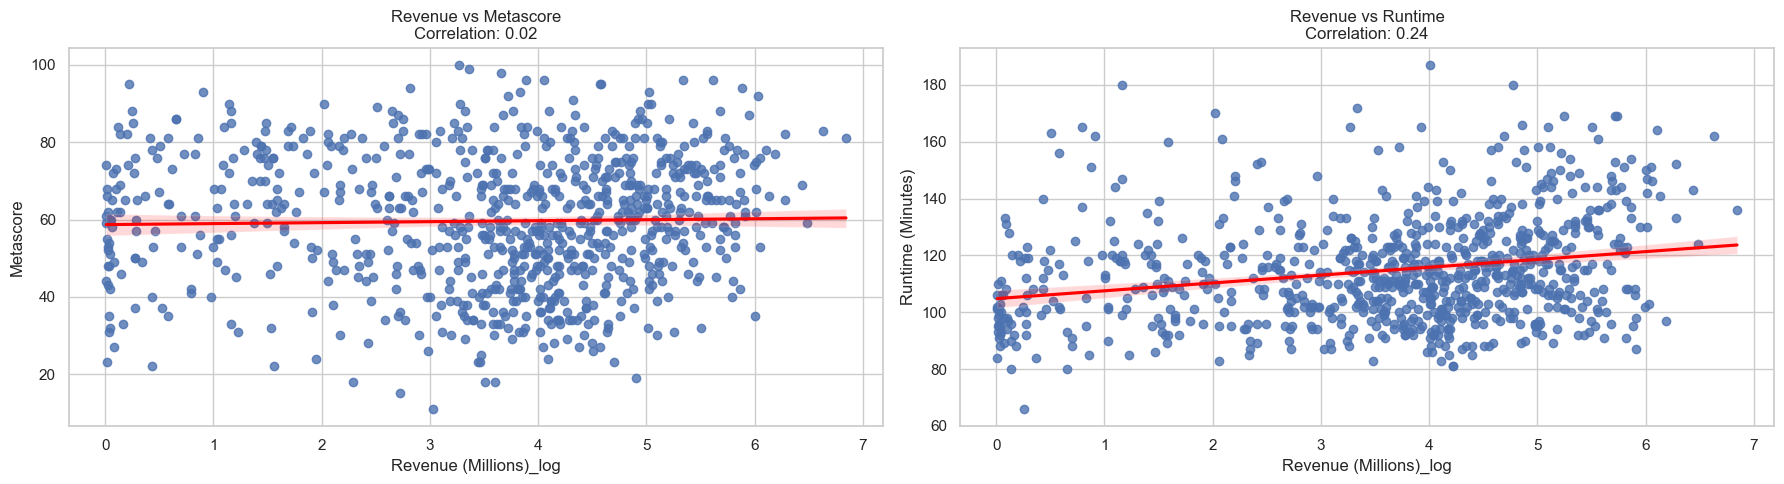

In [176]:
# Based on the correlation values, we can conclude that:
# Revenue and Metascore have a weak positive correlation

# Revenue and Runtime have a weak positive correlation
# Metascore and Runtime have a weak positive correlation

# As revenye data is skewed we can use log transformation to make it normal

movie_cleared["Revenue (Millions)_log"] = np.log1p(movie_cleared["Revenue (Millions)"])

cor_rev_log_to_metascor = movie_cleared["Revenue (Millions)_log"].corr(movie_cleared["Metascore"])
cor_rev_log_to_runtime = movie_cleared["Revenue (Millions)_log"].corr(movie_cleared["Runtime (Minutes)"])


# Visualizing the correlations using seaborn scatterplot with trendline
plt.figure(figsize=(18, 5))

# Correlation between Revenue and Metascore
plt.subplot(1, 2, 1)
sns.regplot(x="Revenue (Millions)_log", y="Metascore", data=movie_cleared,  line_kws={"color":"red"})
plt.title(f"Revenue vs Metascore\nCorrelation: {cor_rev_log_to_metascor:.2f}")

# Correlation between Revenue and Runtime
plt.subplot(1, 2, 2)
sns.regplot(x="Revenue (Millions)_log", y="Runtime (Minutes)", data=movie_cleared,  line_kws={"color":"red"})
plt.title(f"Revenue vs Runtime\nCorrelation: {cor_rev_log_to_runtime:.2f}")


plt.tight_layout()
plt.show()

In [165]:
# Summary of dataset elements 

#Metascore groups 
movie_cleared_metascore = movie_cleared["Metascore"]
high_metascore = movie_cleared_metascore >=60
middle_metascore = (movie_cleared_metascore <60) & (movie_cleared_metascore >30)
low_metascore   =  movie_cleared_metascore <=30

#Revenue groups
movie_cleared_revenue = movie_cleared["Revenue (Millions)"]
high_revenue = movie_cleared_revenue >= movie_cleared_revenue.mean()
middle_revenue = (movie_cleared_revenue < movie_cleared_revenue.mean()) & (movie_cleared_revenue > movie_cleared_revenue.mean()/2)
low_revenue = movie_cleared_revenue <= movie_cleared_revenue.mean()/2


In [166]:
# Top 10 directors with the highest average metascore, only including directors with at least 10 movies
min_metascore_count = 3
top_directors = movie_cleared.groupby("Director")["Metascore"].agg([np.min, np.max, np.mean, "size"])
top_directors = top_directors.rename(columns={"amin": "Min Metascore", "amax": "Max Metascore", "mean": "Average Metascore", "size": "Count"})
top_directors = top_directors[top_directors["Count"] >= min_metascore_count]
top_directors = top_directors.sort_values("Average Metascore", ascending=False).head(10)


In [167]:
min_metascore_count = 3

# Top 10 directors with the highest average metascore, including revenue information
top_directors = movie_cleared.groupby("Director").agg({
    "Metascore": ["size", np.min, np.max, np.mean],
    "Revenue (Millions)": [np.min, np.max, np.mean]
}).round()
top_directors.columns = ["Count", "Min Mtscore", "Max Mtscore", "Avg Mtscore", "Min Rev mln","Max Rev mln", "Avg Rev mln"]
top_directors = top_directors[top_directors["Count"] >= min_metascore_count]

# Sort by average metascore in descending order and get the top 10 directors
top_directors_rev = top_directors.sort_values(["Avg Rev mln","Avg Mtscore"],ascending=False).head(10)
top_directors_mtscore = top_directors.sort_values(["Avg Mtscore","Avg Rev mln"],ascending=False).head(10)


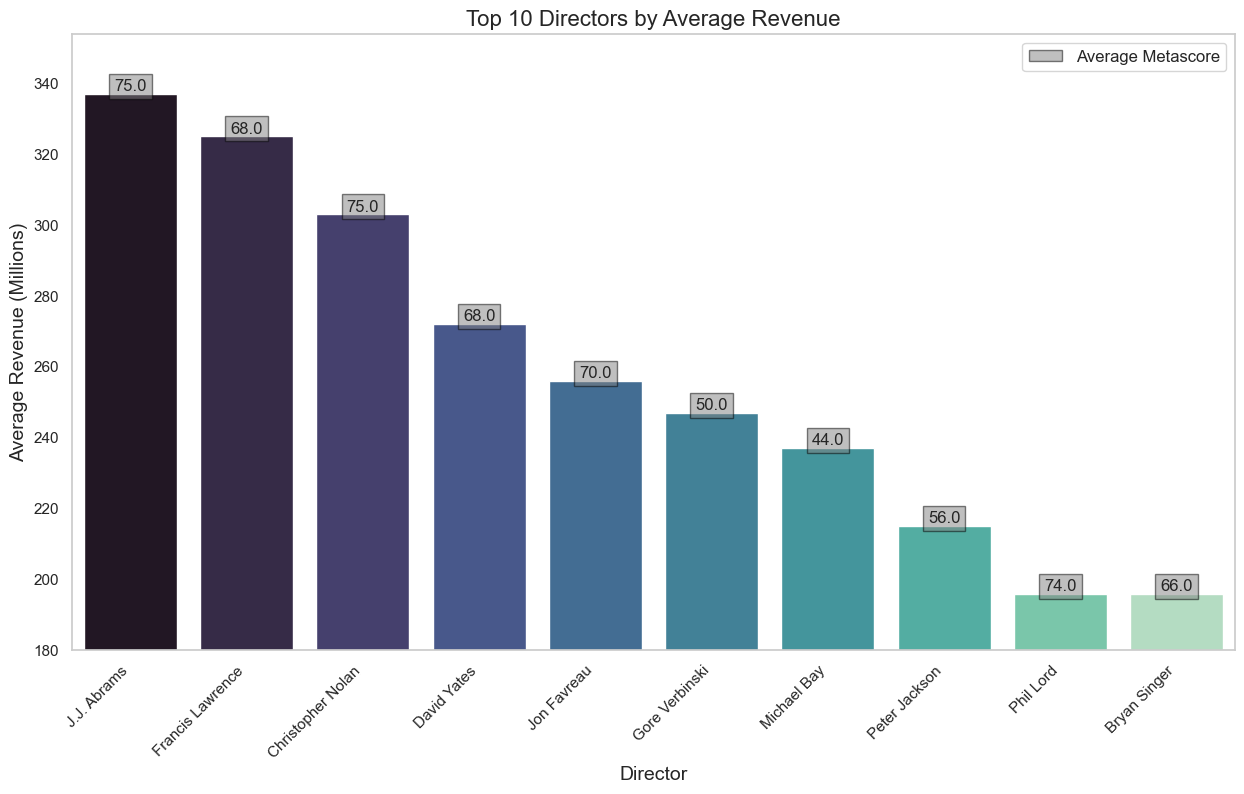

In [168]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    x=top_directors_rev.index,
    y=top_directors_rev["Avg Rev mln"],
    palette="mako"
)

# Adding title and labels
bar_plot.set_title("Top 10 Directors by Average Revenue", fontsize=16)
bar_plot.set_xlabel("Director", fontsize=14)
bar_plot.set_ylabel("Average Revenue (Millions)", fontsize=14)

# Rotating x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding grid lines
bar_plot.yaxis.grid(False)
bar_plot.xaxis.grid(False)

# Setting y-axis limits to improve readability
bar_plot.set_ylim(180)

# Annotating the bars with average metascore
for i, (index, row) in enumerate(top_directors_rev.iterrows()):
    bar_plot.annotate(
        f'{row["Avg Mtscore"]:.1f}', 
        xy=(i, row["Avg Rev mln"]), 
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor="grey", alpha=0.5)
    )

# Adding a legend for the annotations
square_patch = mpatches.Patch(facecolor="grey", alpha=0.5, edgecolor='black', label='Average Metascore')
plt.legend(handles=[square_patch], loc='upper right', fontsize=12)
plt.show()


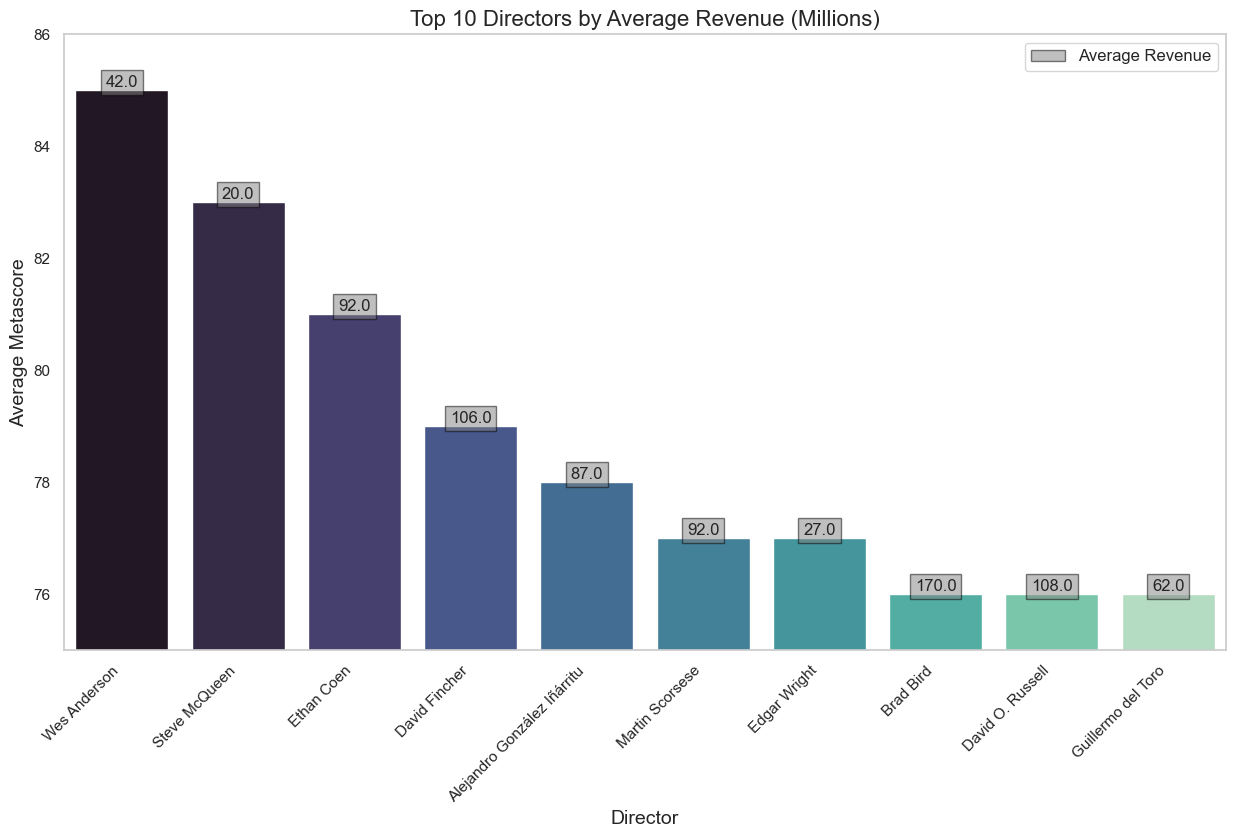

In [169]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the data
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(
    x=top_directors_mtscore.index,
    y=top_directors_mtscore["Avg Mtscore"],
    palette="mako"
)

# Adding title and labels
bar_plot.set_title("Top 10 Directors by Average Revenue (Millions)", fontsize=16)
bar_plot.set_xlabel("Director", fontsize=14)
bar_plot.set_ylabel("Average Metascore", fontsize=14)

# Rotating x-axis labels for better readability
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adding grid lines
bar_plot.yaxis.grid(False)
bar_plot.xaxis.grid(False)

# Setting y-axis limits to improve readability
bar_plot.set_ylim(75, 86)

# Annotating the bars with average metascore
for i, (index, row) in enumerate(top_directors_mtscore.iterrows()):
    bar_plot.annotate(
        f'{row["Avg Rev mln"]:.1f}', 
        xy=(i, row["Avg Mtscore"]), 
        ha='center', 
        va='bottom',
        bbox=dict(boxstyle="square,pad=0.3", edgecolor="black", facecolor="grey", alpha=0.5)
    )

# Adding a legend for the annotations
square_patch = mpatches.Patch(facecolor="grey", alpha=0.5, edgecolor='black', label='Average Revenue')
plt.legend(handles=[square_patch], loc='upper right', fontsize=12)
plt.show()

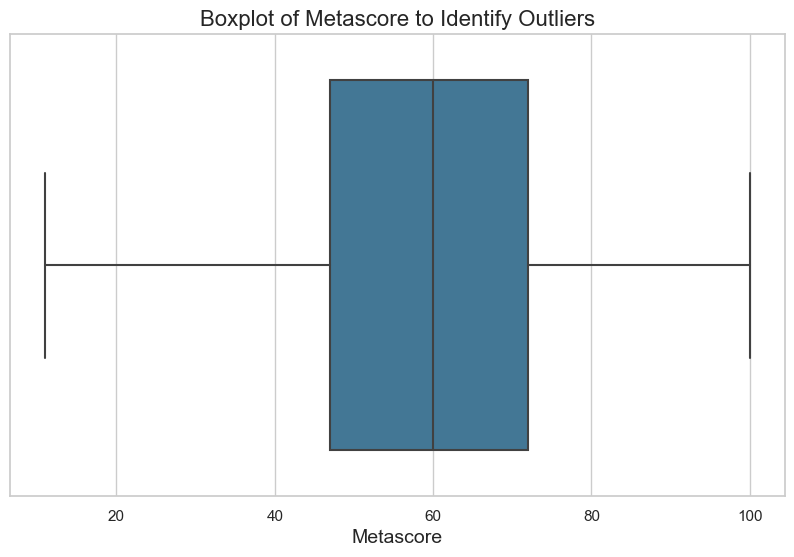

Outliers in Metascore:
Empty DataFrame
Columns: [Title, Director, Metascore]
Index: []
No outliers found in the Metascore column.


In [170]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the boxplot for Metascore to identify outliers
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x=movie_cleared["Metascore"], palette="mako")

# Adding title and labels
box_plot.set_title("Boxplot of Metascore to Identify Outliers", fontsize=16)
box_plot.set_xlabel("Metascore", fontsize=14)

# Display the plot
plt.show()

# Identifying outliers
Q1 = movie_cleared["Metascore"].quantile(0.25)
Q3 = movie_cleared["Metascore"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_metascore = movie_cleared[(movie_cleared["Metascore"] < lower_bound) | (movie_cleared["Metascore"] > upper_bound)]
print("Outliers in Metascore:")
print(outliers_metascore[["Title", "Director", "Metascore"]])

if not outliers_metascore.empty:
    # Visualizing the outliers
    plt.figure(figsize=(15, 8))
    outliers_plot = sns.scatterplot(
        x=outliers_metascore["Title"],
        y=outliers_metascore["Metascore"],
        hue=outliers_metascore["Director"],
        palette="mako",
        s=100
    )

    # Adding title and labels
    outliers_plot.set_title("Outliers in Metascore", fontsize=16)
    outliers_plot.set_xlabel("Movie Title", fontsize=14)
    outliers_plot.set_ylabel("Metascore", fontsize=14)

    # Rotating x-axis labels for better readability
    outliers_plot.set_xticklabels(outliers_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

    # Display the plot
    plt.show()

    # Saving outliers to a CSV file
    outliers_metascore.to_csv("outliers_metascore.csv", index=False)
else:
    print("No outliers found in the Metascore column.")

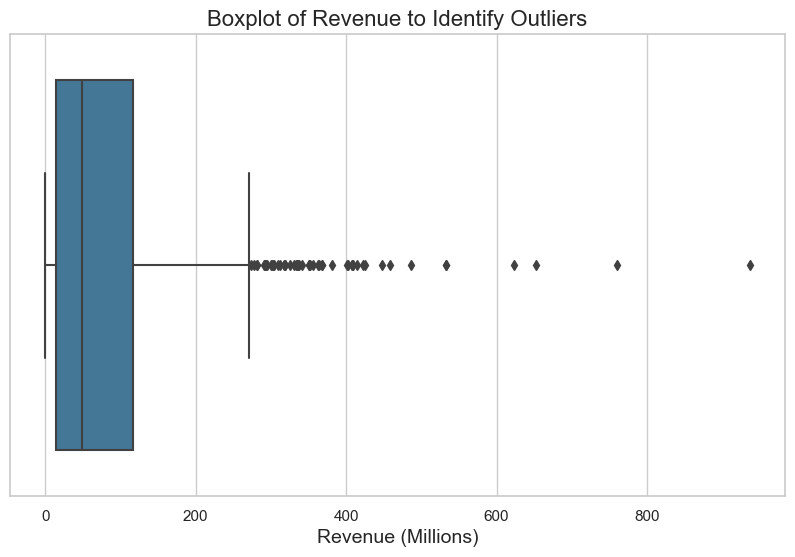

In [171]:
# Plotting the boxplot for Revenue to identify outliers
plt.figure(figsize=(10, 6))
box_plot_revenue = sns.boxplot(x=movie_cleared["Revenue (Millions)"], palette="mako")

# Adding title and labels
box_plot_revenue.set_title("Boxplot of Revenue to Identify Outliers", fontsize=16)
box_plot_revenue.set_xlabel("Revenue (Millions)", fontsize=14)

# Display the plot
plt.show()

# Identifying outliers
Q1_revenue = movie_cleared["Revenue (Millions)"].quantile(0.25)
Q3_revenue = movie_cleared["Revenue (Millions)"].quantile(0.75)
IQR_revenue = Q3_revenue - Q1_revenue
lower_bound_revenue = Q1_revenue - 1.5 * IQR_revenue
upper_bound_revenue = Q3_revenue + 1.5 * IQR_revenue

outliers_revenue = movie_cleared[(movie_cleared["Revenue (Millions)"] < lower_bound_revenue) | (movie_cleared["Revenue (Millions)"] > upper_bound_revenue)]

if not outliers_revenue.empty:
    ''' Displaying outliers as a table
    print("Outliers in Revenue:")
    display(outliers_revenue[["Title", "Director", "Revenue (Millions)"]])'''
    
    # Saving outliers to a CSV file
    outliers_revenue.to_csv("outliers_revenue.csv", index=False)
else:
    print("No outliers found in the Revenue column.")


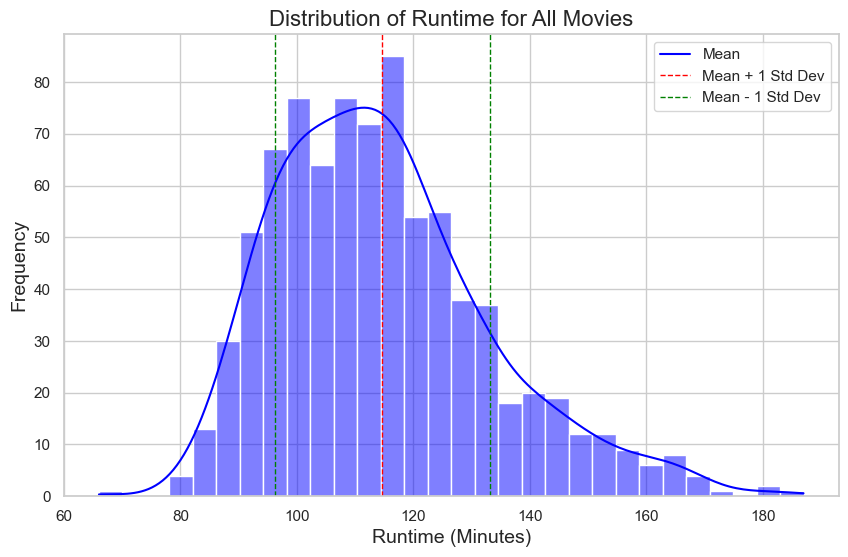

Mean Runtime: 114.66
Standard Deviation of Runtime: 18.47


In [172]:
# Ensure seaborn styles are applied
sns.set(style="whitegrid")

# Plotting the histogram for Runtime (Minutes)
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(movie_cleared["Runtime (Minutes)"], bins=30, kde=True, color='blue')

# Adding title and labels
hist_plot.set_title("Distribution of Runtime for All Movies", fontsize=16)
hist_plot.set_xlabel("Runtime (Minutes)", fontsize=14)
hist_plot.set_ylabel("Frequency", fontsize=14)

# Adding mean and standard deviation lines
mean_runtime = movie_cleared["Runtime (Minutes)"].mean()
std_runtime = movie_cleared["Runtime (Minutes)"].std()

plt.axvline(mean_runtime, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_runtime + std_runtime, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mean_runtime - std_runtime, color='green', linestyle='dashed', linewidth=1)

# Adding legend
plt.legend({'Mean': mean_runtime, 'Mean + 1 Std Dev': mean_runtime + std_runtime, 'Mean - 1 Std Dev': mean_runtime - std_runtime})

# Display the plot
plt.show()

#Rounding the mean and standard deviation to two decimal places
mean_runtime = round(mean_runtime, 2)
std_runtime = round(std_runtime, 2)

# Print mean and standard deviation
print(f"Mean Runtime: {mean_runtime}")
print(f"Standard Deviation of Runtime: {std_runtime}")

In [173]:
# Find the film with the longest runtime
longest_runtime_film = movie_cleared.loc[movie_cleared["Runtime (Minutes)"].idxmax()]

# Find the film with the shortest runtime
shortest_runtime_film = movie_cleared.loc[movie_cleared["Runtime (Minutes)"].idxmin()]

print("Film with the longest runtime:")
print(longest_runtime_film[["Title", "Runtime (Minutes)"]])

print("\nFilm with the shortest runtime:")
print(shortest_runtime_film[["Title", "Runtime (Minutes)"]])

Film with the longest runtime:
Title                The Hateful Eight
Runtime (Minutes)                  187
Name: 77, dtype: object

Film with the shortest runtime:
Title                Ma vie de Courgette
Runtime (Minutes)                     66
Name: 677, dtype: object
